# Machine Learning Non Supervisé

Dans ce script, nous présentons des méthodes statistiques empruntées au machine learning non supervisé:
- Clustering
- Réduction de dimension

In [2]:
# Chargement des modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
# Chargement des données
donnees = pd.read_csv("../Data/mtcars.csv")
donnees.head(5)

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2

In [19]:
# On standardise nos données
from sklearn.preprocessing import StandardScaler

X = np.array(donnees)

preprocess = StandardScaler(with_mean=True, with_std=True)
X_standardized = preprocess.fit_transform(X)

In [20]:
X_standardized

array([[ 1.53299135e-01, -1.06667720e-01, -5.79750316e-01,
        -5.43654869e-01,  5.76594481e-01, -6.20166581e-01,
        -7.89600577e-01, -8.81917104e-01,  1.20894105e+00,
         4.30331483e-01,  7.46967077e-01],
       [ 1.53299135e-01, -1.06667720e-01, -5.79750316e-01,
        -5.43654869e-01,  5.76594481e-01, -3.55382189e-01,
        -4.71201785e-01, -8.81917104e-01,  1.20894105e+00,
         4.30331483e-01,  7.46967077e-01],
       [ 4.56736599e-01, -1.24445674e+00, -1.00602601e+00,
        -7.95569902e-01,  4.81584062e-01, -9.31677630e-01,
         4.32823359e-01,  1.13389342e+00,  1.20894105e+00,
         4.30331483e-01, -1.14010764e+00],
       [ 2.20729683e-01, -1.06667720e-01,  2.23615417e-01,
        -5.43654869e-01, -9.81576392e-01, -2.33633287e-03,
         9.04735855e-01,  1.13389342e+00, -8.27170192e-01,
        -9.46729262e-01, -1.14010764e+00],
       [-2.34426513e-01,  1.03112130e+00,  1.05977159e+00,
         4.19549669e-01, -8.48561806e-01,  2.31296954e-01,
  

## 1. K-means

In [21]:
from sklearn.cluster import KMeans

model_kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300)

model_kmeans.fit(X_standardized)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
model_kmeans.labels_

array([4, 4, 3, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 0, 2,
       2, 2, 2, 3, 4, 3, 1, 4, 1, 3])

- Procédure pour obtenir le nombre optimal de clusters

In [26]:
variance_intraclasse = list()

for i in range(1, 11):
    
    model_kmeans_temp = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=42)
    model_kmeans_temp.fit(X_standardized)
    variance_intraclasse.append(model_kmeans_temp.inertia_)   

variance_intraclasse

[352.0,
 184.85816006895502,
 132.54135052123922,
 89.61964066244379,
 73.35356712832888,
 60.61829339315261,
 51.30990165093043,
 43.36950262685858,
 37.36526010081329,
 30.868718235087982]

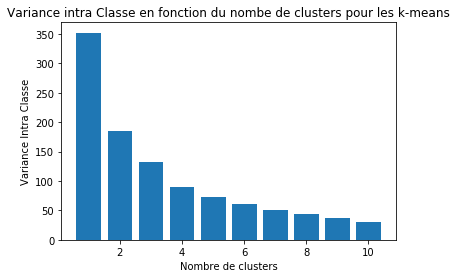

In [27]:
plt.bar(range(1, 11), variance_intraclasse)

plt.xlabel("Nombre de clusters")
plt.ylabel("Variance Intra Classe")
plt.title("Variance intra Classe en fonction du nombe de clusters pour les k-means")

plt.show()

## 2. Classification Ascendante Hiérarchique 

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram

Z = linkage(X_standardized, method='ward', metric='euclidean')

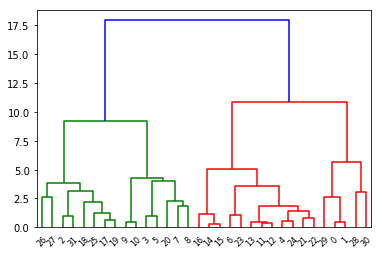

In [32]:
dendrogram(Z)

plt.show()

## 3. Analyse en Composantes Principales 

In [39]:
from sklearn.decomposition import PCA

model_pca = PCA(n_components=X_standardized.shape[1], random_state=42)

X_reducted = model_pca.fit_transform(X_standardized)

In [40]:
X_reducted.shape

(32, 11)

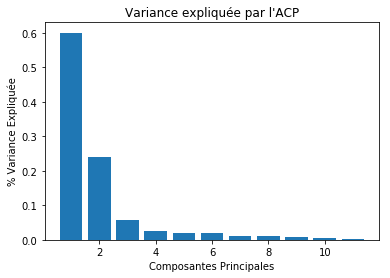

In [41]:
plt.bar(range(1, X_standardized.shape[1]+1), model_pca.explained_variance_ratio_)

plt.xlabel("Composantes Principales")
plt.ylabel("% Variance Expliquée")
plt.title("Variance expliquée par l'ACP")

plt.show()